# Assignment 9: Unsupervised Learning [_/100 Marks]

### <span style="color:red">Please do it without relying on AI tools and/or friends.</span>

### Once you are finished, ensure to complete the following steps:

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

---
## Question 1 - <span style="color:green">[100]</span>

You are going to use unsupervised techniques to identify and label the unknown cells in the data set `A9_data.csv` based on the few known cells.

---
### <span style="color:orange">Data Dictionary</span>

The given dataset, `A9_data.csv`, lists certain geometrical characteristics of different cells (each row represents one sample, *i.e.*, a cell) and has the following attributes:

|Column Index| Attribute | Description |
| --- | --- | --- |
|0|`cell_feature_1`|Some measurement pertaining to cell shape (numerical attribute).|
|1|`cell_feature_2`|Some measurement pertaining to cell shape (numerical attribute).|
|2|`cell_feature_3`|Some measurement pertaining to cell shape (numerical attribute).|
|3|`cell_feature_4`|Some measurement pertaining to cell shape (numerical attribute).|
|4|`cell_feature_5`|Some measurement pertaining to cell shape (numerical attribute).|
|5|`cell_feature_6`|Some measurement pertaining to cell shape (numerical attribute).|
|6|`cell_type`|Type of cell (categorical attribute).|


---
### <span style="color:orange">Toolbox</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as prep
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display
%matplotlib inline

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

seed = 1201 # work with this seed throughout your work
np.random.seed(seed)

### Q1.1 - <span style="color:red">[10]</span> - Load the dataset as a pandas dataframe and name it `dfc`. Display the first five rows of `dfc`. How many observations are there in `dfc` and for how many of them the cell type is known? Name the known cell types. Then, create a copy of `dfc` and name it `data` and drop the attribute "cell_type" from `data`.

In [2]:
dfc = pd.read_csv("A9_data.csv")
display(dfc.head())

num_obs = len(dfc)
#known_obs = dfc['cell_type'].notnull().sum()
known_obs = (dfc['cell_type'] != 'unknown').sum()
#cell_types = dfc['cell_type'].unique()
cell_types = dfc[dfc['cell_type'] != 'unknown']['cell_type'].unique()

print(f"Number of Observations = {num_obs}\nThe Cell Type is known for {known_obs} observations\nThe known cell types are: {cell_types}")

data = dfc.drop('cell_type', axis = 1).copy()

,cell_feature_1,cell_feature_2,cell_feature_3,cell_feature_4,cell_feature_5,cell_feature_6,cell_type
0,-8.969499,-6.294874,-0.609292,-0.538988,3.045112,3.944128,D
1,3.559447,-8.800391,-9.503687,3.743288,-5.254547,-0.528753,unknown
2,4.198048,-7.418047,-8.449960,3.376891,-7.041192,0.586114,unknown
3,-1.580189,4.640504,-3.702296,7.572398,6.572311,-2.315348,unknown
4,-1.762427,5.716517,-3.511441,9.449469,6.463332,-3.510625,unknown


Number of Observations = 1200
The Cell Type is known for 4 observations
The known cell types are: ['D' 'A' 'C' 'B']


**Written Answer:**

Number of Observations = 1200

The Cell Type is known for 4 observations

The known cell types are: ['D' 'A' 'C' 'B']

### Q1.2 - <span style="color:red">[10]</span> - Use `seaborn.pairplot` to investigate pairwise relationships in the dataframe `data`. Could we use this plots to reliably say how many clusters are there in the data? Why?

Hint: You could set the argument `corner` to `True` to speed up the plotting.

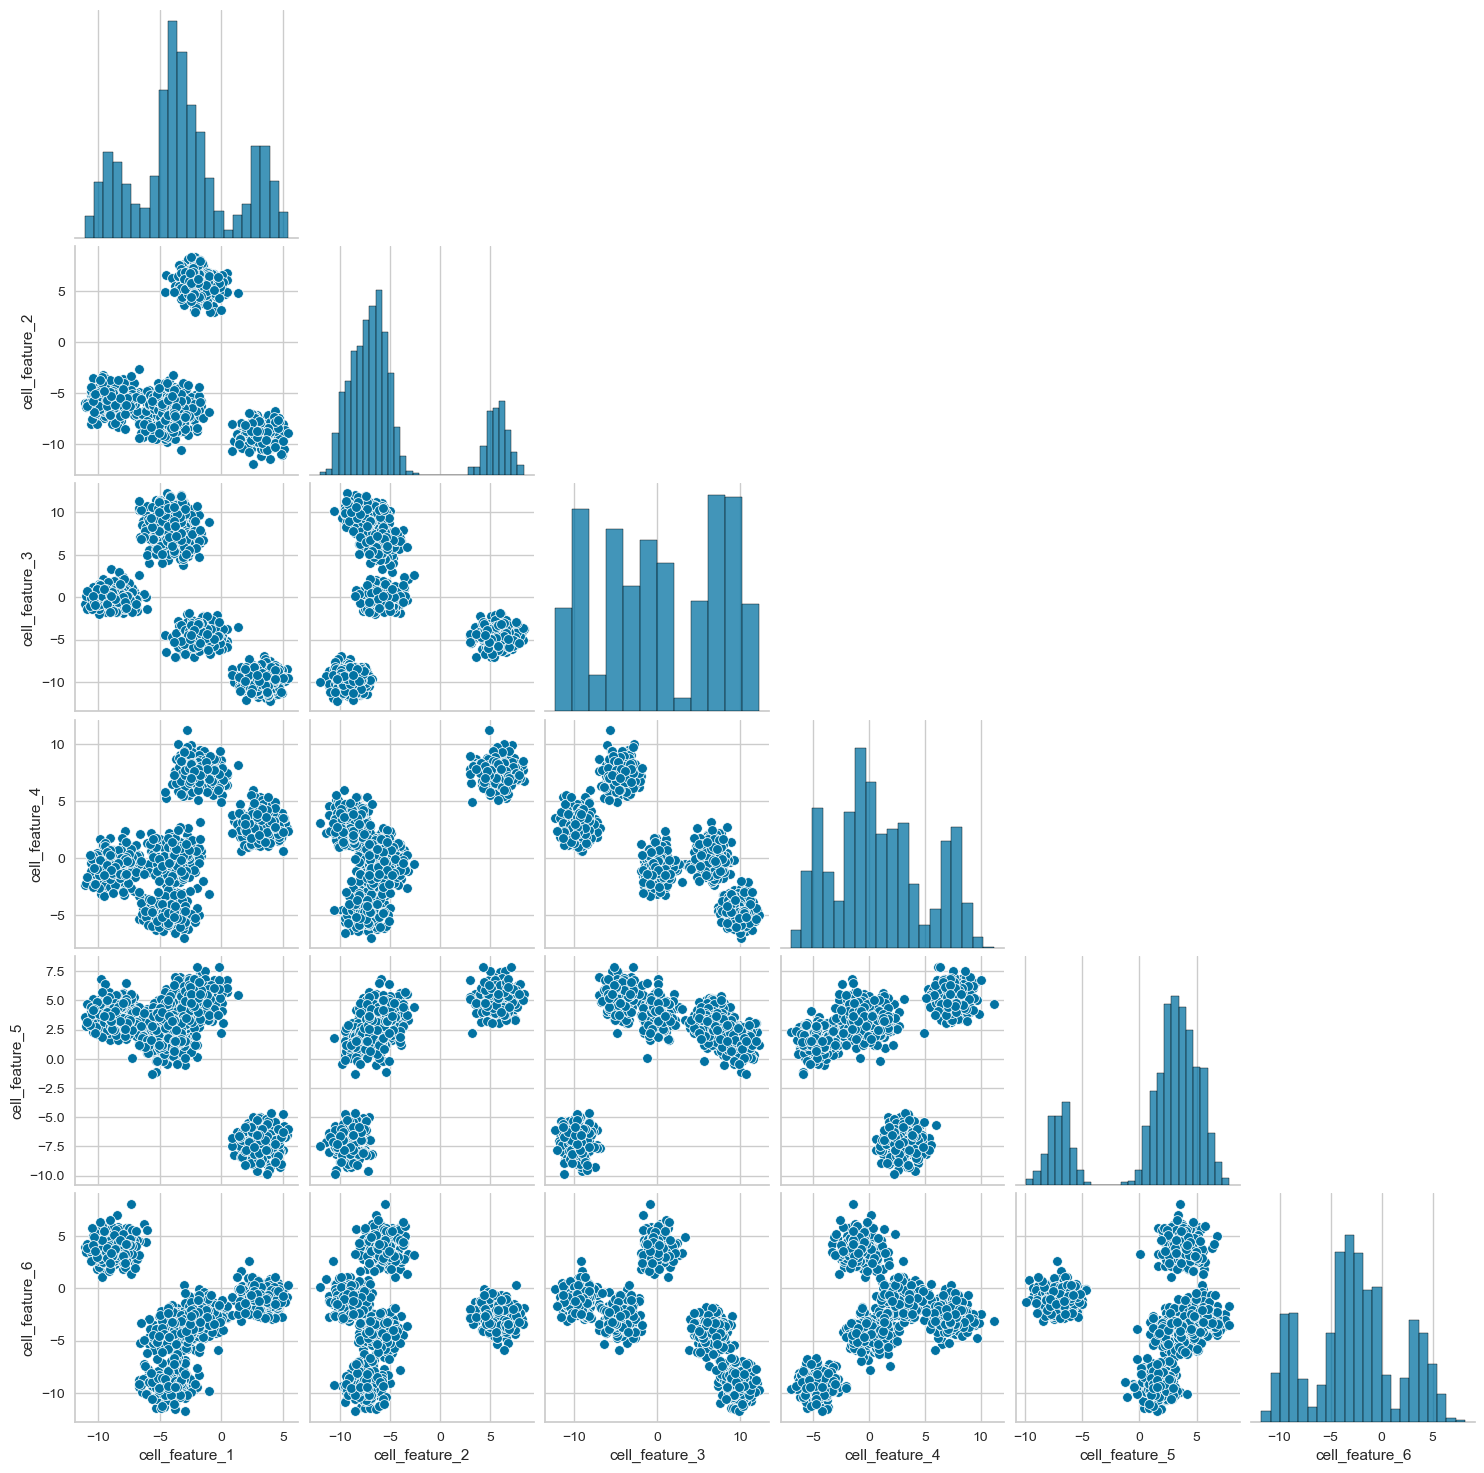

In [3]:
sns.pairplot(data, corner=True)
plt.show()

**Written Answer:**
Pairplots are useful in looking at the relationship between variables, but this would not alone be enough to determine the number of clusters. This would require methods such as elbow method and silhouette scores.

### Q1.3 - <span style="color:red">[15]</span> - Cluster the dataframe `data` using `KMeans` with `k` in $[2, 3, 4, 5, 6]$. Plot inertia versus `k` as well as silhouette score versus `k` in separate plot windows. Solely relying on these two plots, what are the best **two** values that you would conclude for `k`? Why?

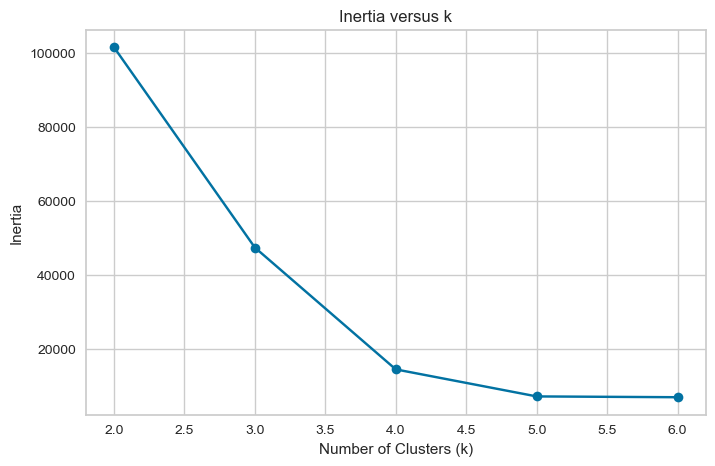

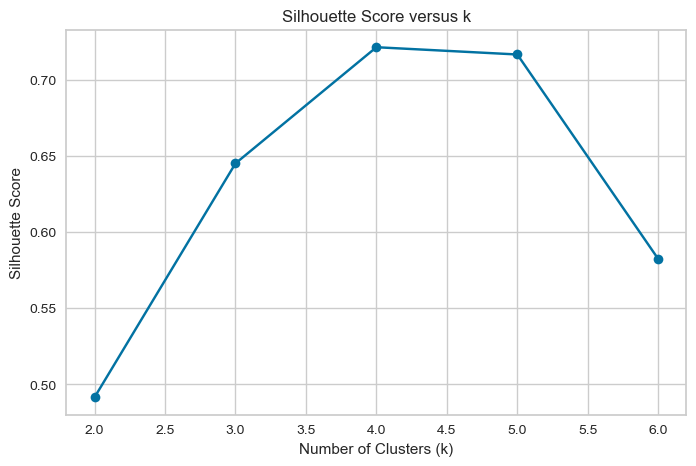

In [4]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

k_values = [2, 3, 4, 5, 6]
inertia_values = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Plotting inertia versus k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia versus k')
plt.show()

# Plotting silhouette score versus k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score versus k')
plt.show()

**Written Answer:**
The two best K values are 4 and 5. Since these two values are elbows, more or less clusters than this would not be helpful. The silhouette curve further confirms that k = 4 and 5 are the best values.

### Q1.4 - <span style="color:red">[20]</span> - Do the following steps on the dataframe `data`:
1. Plot the silhouette diagrams (*i.e.*, the stacked silhouette scores for clusters members) for the choices of `k` which you concluded in the previous question (*i.e.*, Q1.2).
2. Do a 2-component PCA and plot PC1 against PC2.
3. Do a 2-component t-SNE with a perplexity of 100 and plot the first embedding against the second embedding.
4. Interpret, in writing, the results of the previous 3 steps. What would be your final choice for the number of clusters (`k`)?

For n_clusters = 4, the average silhouette_score is : 0.7215941217058416
For n_clusters = 5, the average silhouette_score is : 0.7168196368489639


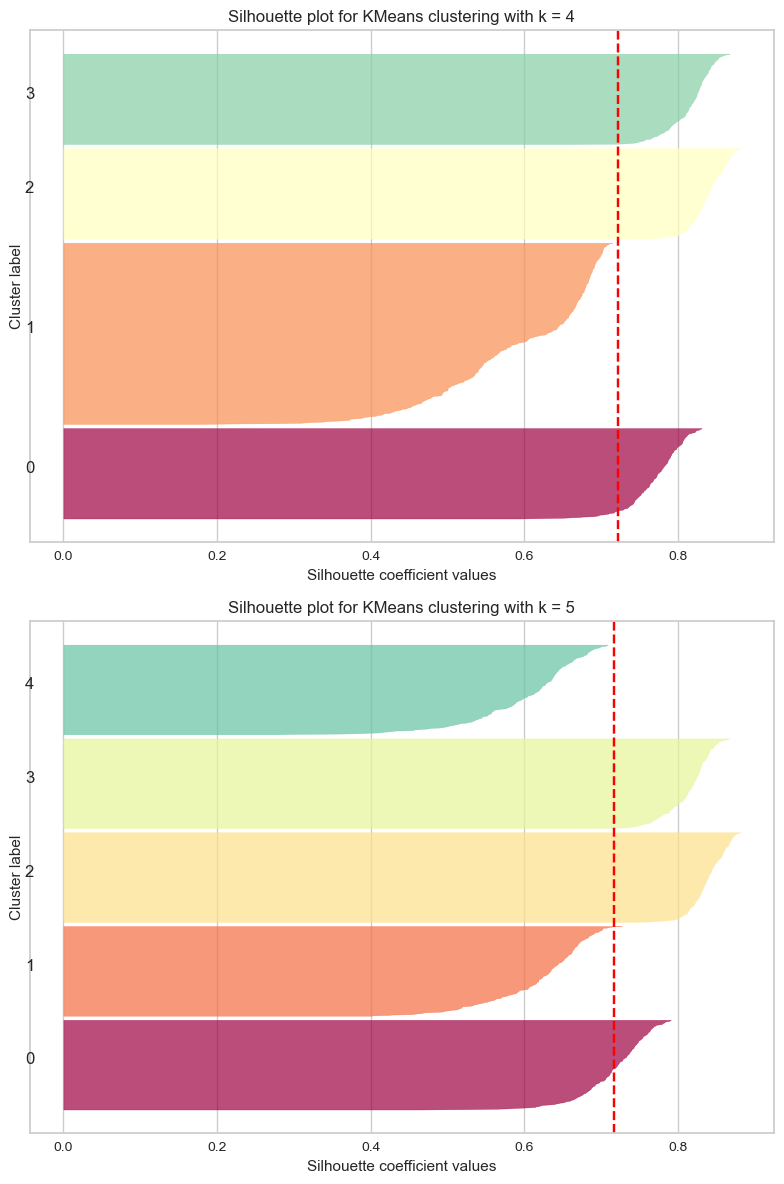

In [5]:
from sklearn.metrics import silhouette_samples

k_values = [4, 5]

fig, axs = plt.subplots(len(k_values), 1, figsize=(8, len(k_values) * 6))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)
    
    y_lower = 10
    for j in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster j, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.get_cmap("Spectral")(j / k)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        
        y_lower = y_upper + 10  # Add 10 for the next cluster

    axs[i].set_title(f"Silhouette plot for KMeans clustering with k = {k}")
    axs[i].set_xlabel("Silhouette coefficient values")
    axs[i].set_ylabel("Cluster label")
    axs[i].axvline(x=silhouette_avg, color="red", linestyle="--")  # Average silhouette score as a vertical line
    axs[i].set_yticks([])  # Clear y-axis ticks

plt.tight_layout()
plt.show()

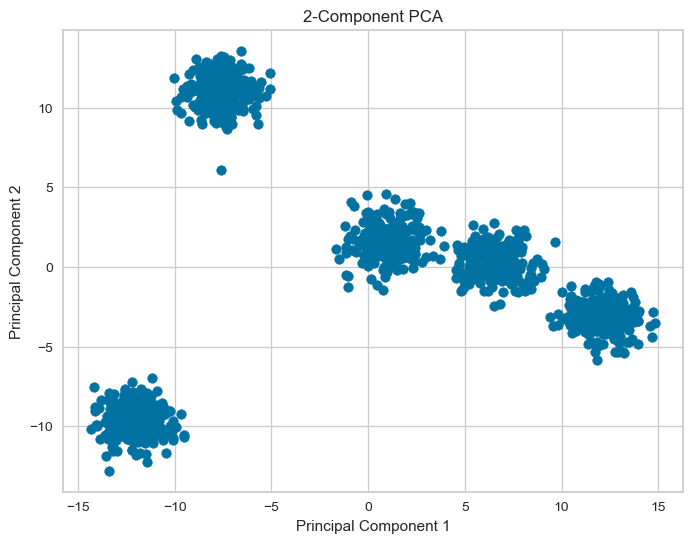

In [6]:
pca = PCA(n_components=2, random_state=seed)
data_pca = pca.fit_transform(data)

# Plotting PC1 against PC2
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2-Component PCA")
plt.show()

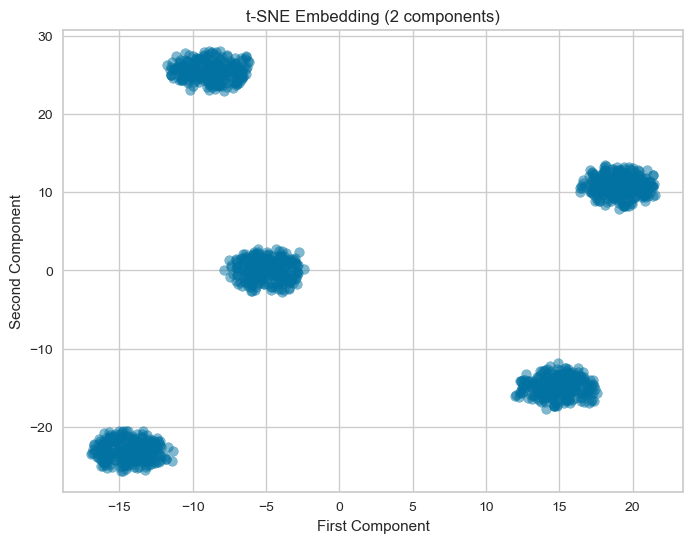

In [7]:
tsne = TSNE(n_components=2, perplexity=100, random_state=seed)
embeddings = tsne.fit_transform(data)

# Create a scatter plot of the first embedding against the second embedding
plt.figure(figsize=(8, 6))
plt.scatter(embeddings[:, 0], embeddings[:, 1], alpha=0.5)
plt.title('t-SNE Embedding (2 components)')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.grid(True)
plt.show()

**Written Answer:** 
As confirmed by the PCA and t-sne plots, there are 5 clear separations and well defined clusters of points. Therefore, my final choice for the number of clusters is 5. 

### Q1.5 - <span style="color:red">[30]</span> - Now that you have the number of clusters figured out, use the sample cells with known cell type to update the type of the "unknown" cells in the dataframe `dfc` (which you created in Q1.1) using decision boundaries defined over the t-SNE's first and second embeddings. The decision boundaries that you define could be of any geometric shape (*e.g.*, square) as long as they can perfectly isolate the clusters from each other. Also, plot these:
1.   scatter plot TSNE_embedding_0 vs TSNE_embedding_1, reflecting in a color-coded way, original known cells, unknown cells, and decision boundaries,
2.   scatter plot TSNE_embedding_0 vs TSNE_embedding_1 after updating the cell type of the unknown cells. Use different colors to distinguish the clusters,
3.   scatter plot "cell_feature_1" against "cell_feature_5" color coded by their updated "cell_type". This plot must have a legend indicating what color is referring to what type of cell.

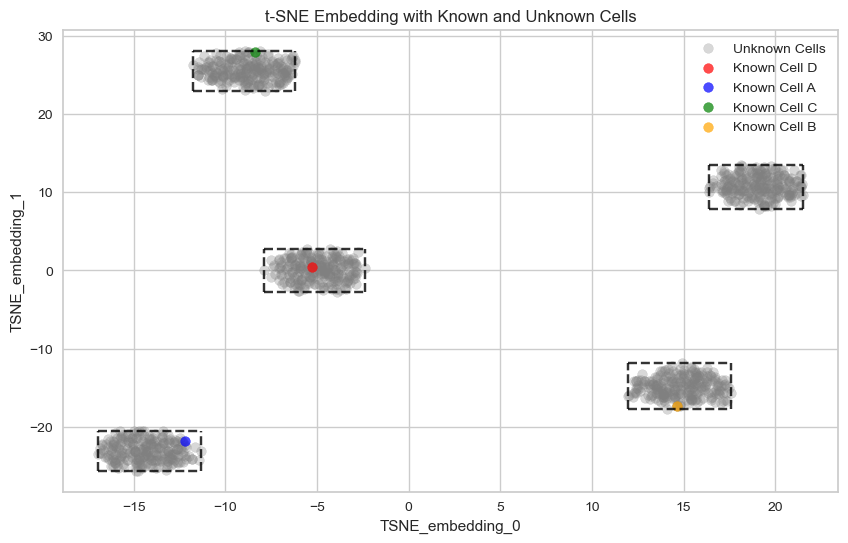

In [8]:
dfc = pd.read_csv("A9_data.csv")

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=seed)
clusters = kmeans.fit_predict(embeddings)

# Create a dictionary to map known cell types to specific colors
known_colors = {'D': 'red', 'A': 'blue', 'C': 'green', 'B': 'orange'}

# Plot the clusters and decision boundaries
plt.figure(figsize=(10, 6))

# Plot unknown cells
unknown_indices = (dfc['cell_type'] == 'unknown')
plt.scatter(embeddings[unknown_indices, 0], embeddings[unknown_indices, 1], 
            label='Unknown Cells', color='gray', alpha=0.3)

# Plot known cells with the same color for each known cell type
for cell_type in known_colors.keys():
    cell_indices = (dfc['cell_type'] == cell_type)
    plt.scatter(embeddings[cell_indices, 0], embeddings[cell_indices, 1], 
                label=f'Known Cell {cell_type}', color=known_colors[cell_type], alpha=0.7)

# Plot decision boundaries as boxes around clusters
for i in range(num_clusters):
    cluster_indices = (clusters == i)
    x_min, x_max = np.min(embeddings[cluster_indices, 0]), np.max(embeddings[cluster_indices, 0])
    y_min, y_max = np.min(embeddings[cluster_indices, 1]), np.max(embeddings[cluster_indices, 1])
    
    plt.plot([x_min, x_min], [y_min, y_max], color='black', linestyle='--', alpha=0.8)
    plt.plot([x_max, x_max], [y_min, y_max], color='black', linestyle='--', alpha=0.8)
    plt.plot([x_min, x_max], [y_min, y_min], color='black', linestyle='--', alpha=0.8)
    plt.plot([x_min, x_max], [y_max, y_max], color='black', linestyle='--', alpha=0.8)

plt.title('t-SNE Embedding with Known and Unknown Cells')
plt.xlabel('TSNE_embedding_0')
plt.ylabel('TSNE_embedding_1')
plt.legend()
plt.grid(True)
plt.show()

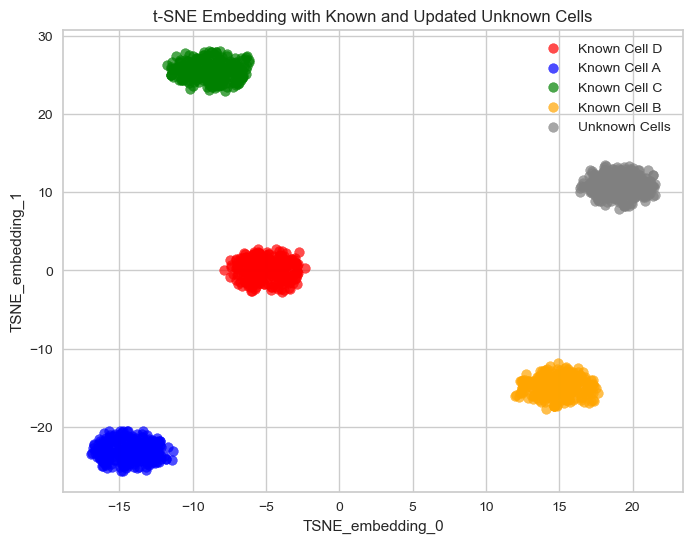

In [9]:
# Update unknown cell types based on clusters
dfc.loc[unknown_indices, 'cell_type'] = clusters[unknown_indices]

# Plot updated cell types for 'unknown' cells with matching colors
plt.figure(figsize=(8, 6))

# Plot known cells with the same color for each known cell type
for cell_type in known_colors.keys():
    cell_indices = (dfc['cell_type'] == cell_type)
    plt.scatter(embeddings[cell_indices, 0], embeddings[cell_indices, 1], 
                label=f'Known Cell {cell_type}', color=known_colors[cell_type], alpha=0.7)

# Create a dictionary to map known cell types to cluster indices
known_cell_clusters = {}
for cell_type, color in known_colors.items():
    cell_indices = (dfc['cell_type'] == cell_type)
    if cell_indices.any():
        cluster_index = np.argmax(np.bincount(clusters[cell_indices]))
        known_cell_clusters[cell_type] = cluster_index

# Plot updated unknown cells with colors matching respective known cell colors (if available)
for i in range(num_clusters):
    cluster_indices = (clusters == i)
    matching_known_color = None
    for cell_type, cluster_idx in known_cell_clusters.items():
        if cluster_idx == i:
            matching_known_color = known_colors[cell_type]
            break
    if matching_known_color:
        plt.scatter(embeddings[cluster_indices, 0], embeddings[cluster_indices, 1], 
                    #label=f'Cluster {i} (Updated)',
                    color=matching_known_color, alpha=0.7)
    else:
        plt.scatter(embeddings[cluster_indices, 0], embeddings[cluster_indices, 1], 
                    label='Unknown Cells', color='gray', alpha=0.7)

plt.title('t-SNE Embedding with Known and Updated Unknown Cells')
plt.xlabel('TSNE_embedding_0')
plt.ylabel('TSNE_embedding_1')
plt.legend()
plt.grid(True)
plt.show()


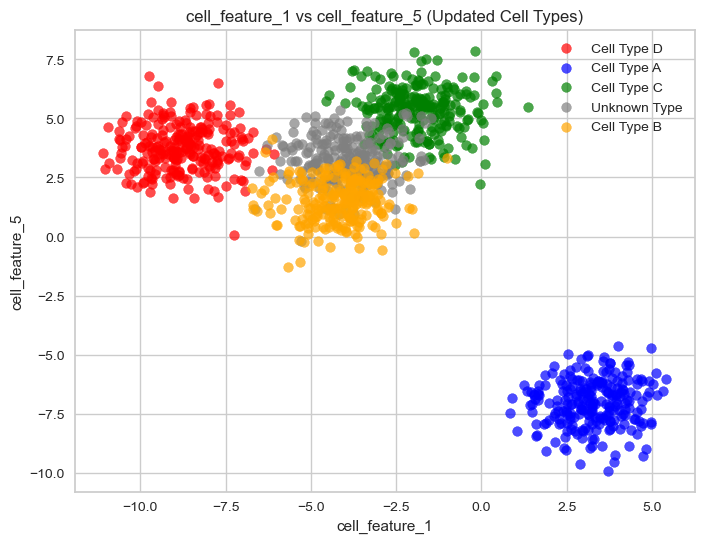

In [10]:
# Plot "cell_feature_1" against "cell_feature_5" color-coded by updated "cell_type"
plt.figure(figsize=(8, 6))

# Plot each updated cell type separately using colors from clusters
for i in range(num_clusters):
    cluster_indices = (clusters == i)
    matching_known_color = None
    for cell_type, cluster_idx in known_cell_clusters.items():
        if cluster_idx == i:
            matching_known_color = known_colors[cell_type]
            break
    if matching_known_color is not None:
        plt.scatter(dfc.loc[cluster_indices, 'cell_feature_1'], 
                    dfc.loc[cluster_indices, 'cell_feature_5'], 
                    label=f'Cell Type {cell_type}', color=matching_known_color, alpha=0.7)
    else:
        plt.scatter(dfc.loc[cluster_indices, 'cell_feature_1'], 
                    dfc.loc[cluster_indices, 'cell_feature_5'], 
                    label='Unknown Type', color='gray', alpha=0.7)

plt.title('cell_feature_1 vs cell_feature_5 (Updated Cell Types)')
plt.xlabel('cell_feature_1')
plt.ylabel('cell_feature_5')
plt.legend()
plt.grid(True)
plt.show()


------------------------------------------------------------------------------------------------------

### Q1.6 - <span style="color:red">[15]</span> - This question in independent of Q1.5. This time, we want to update the cell type of the unknown cells using a different method. We have the number of clusters figured out in Q1.4 already. Use the sample cells with known cell type to update the type of the "unknown" cells in the dataframe `dfc` (which you created in Q1.1) using `kmeans.predict()`. Finally, scatter plot "cell_feature_1" against "cell_feature_5" color coded by their updated "cell_type". This plot must have a legend indicating what color is referring to what type of cell.

In [11]:
dfc2 = pd.read_csv("A9_data.csv")

idx_A = dfc2[dfc2['cell_type'] == 'A'].index
idx_B = dfc2[dfc2['cell_type'] == 'B'].index
idx_C = dfc2[dfc2['cell_type'] == 'C'].index
idx_D = dfc2[dfc2['cell_type'] == 'D'].index

data = dfc2.drop('cell_type', axis=1).copy() # Same as Q1.1

kmeans = KMeans(n_clusters=num_clusters, random_state=seed)
kmeans.fit(data)

dfc2["cell_type"] = kmeans.predict(data)

print(f'Value for A = {dfc2.cell_type[idx_A].values}')
print(f'Value for B = {dfc2.cell_type[idx_B].values}')
print(f'Value for C = {dfc2.cell_type[idx_C].values}')
print(f'Value for D = {dfc2.cell_type[idx_D].values}')

Value for A = [2]
Value for B = [1]
Value for C = [3]
Value for D = [0]


In [12]:
#labels = {dfc2.loc[idx_A, 'cell_type'].index:"A", dfc2.loc[idx_B, 'cell_type'].index:"B", 
          #dfc2.loc[idx_C, 'cell_type'].index:"C", dfc2.loc[idx_D, 'cell_type'].index:"D"}

labels = {2:"A", 1:"B", 3:"C", 0:"D", 4:"Unknown"}
    
dfc2["cell_type"] = dfc2["cell_type"].replace(labels)

display(dfc2.head())
display(dfc2.tail())

,cell_feature_1,cell_feature_2,cell_feature_3,cell_feature_4,cell_feature_5,cell_feature_6,cell_type
0,-8.969499,-6.294874,-0.609292,-0.538988,3.045112,3.944128,D
1,3.559447,-8.800391,-9.503687,3.743288,-5.254547,-0.528753,A
2,4.198048,-7.418047,-8.449960,3.376891,-7.041192,0.586114,A
3,-1.580189,4.640504,-3.702296,7.572398,6.572311,-2.315348,C
4,-1.762427,5.716517,-3.511441,9.449469,6.463332,-3.510625,C


,cell_feature_1,cell_feature_2,cell_feature_3,cell_feature_4,cell_feature_5,cell_feature_6,cell_type
1195,-3.824357,-8.354577,10.646745,-5.190918,1.507511,-7.206431,B
1196,2.887557,-8.693271,-9.210909,3.847411,-6.525344,-2.498607,A
1197,-3.735823,-7.266482,8.431328,-4.227927,1.565242,-9.428546,B
1198,-2.267494,4.673262,-3.822739,7.662381,4.501763,-2.435843,C
1199,-2.482615,4.447534,-4.492245,7.021973,4.771130,-2.679261,C


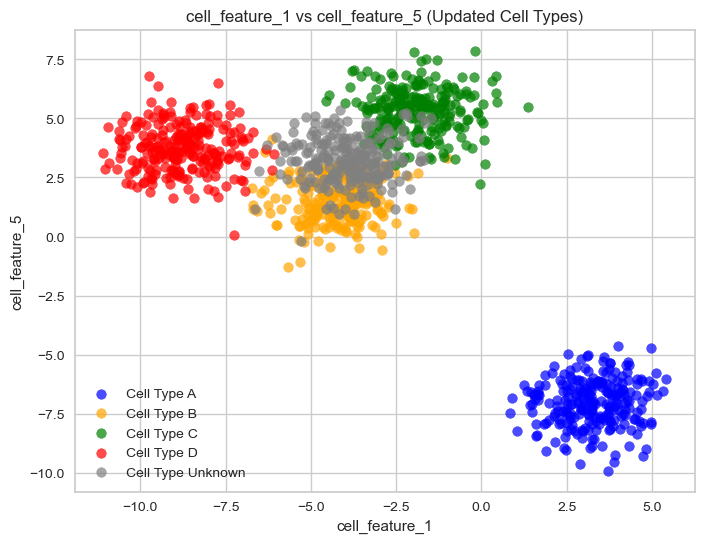

In [13]:
# Scatter plot "cell_feature_1" against "cell_feature_5" color coded by their updated "cell_type"
plt.figure(figsize=(8, 6))

# Create mappings of cell types to colors
color_map = {'A': 'blue', 'B': 'orange', 'C': 'green', 'D': 'red', 'Unknown': 'gray'}

# Plot each updated cell type separately with the respective color
for cell_type, color in color_map.items():
    cell_indices = (dfc2['cell_type'] == cell_type)
    plt.scatter(dfc2.loc[cell_indices, 'cell_feature_1'], 
                dfc2.loc[cell_indices, 'cell_feature_5'], 
                label=f'Cell Type {cell_type}', color=color, alpha=0.7)

plt.title('cell_feature_1 vs cell_feature_5 (Updated Cell Types)')
plt.xlabel('cell_feature_1')
plt.ylabel('cell_feature_5')
plt.legend()
plt.grid(True)
plt.show()